# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [13]:
mydata = pd.read_csv('mydata_final.csv')
mydata.head(n=10)

,Unnamed: 0,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,0,0,False,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,1,1,0,1,1,False,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,2,1,0,1,1,False,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,3,1,1,1,1,False,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,4,1,0,0,0,False,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5,5,1,0,0,0,False,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
6,6,1,0,1,0,False,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
7,7,1,0,1,0,False,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
8,8,1,0,0,0,False,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
9,9,1,0,0,0,False,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [14]:
mydata.isna().sum()

Unnamed: 0                                0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [15]:
y = mydata.mau
X = mydata.drop('mau',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [16]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

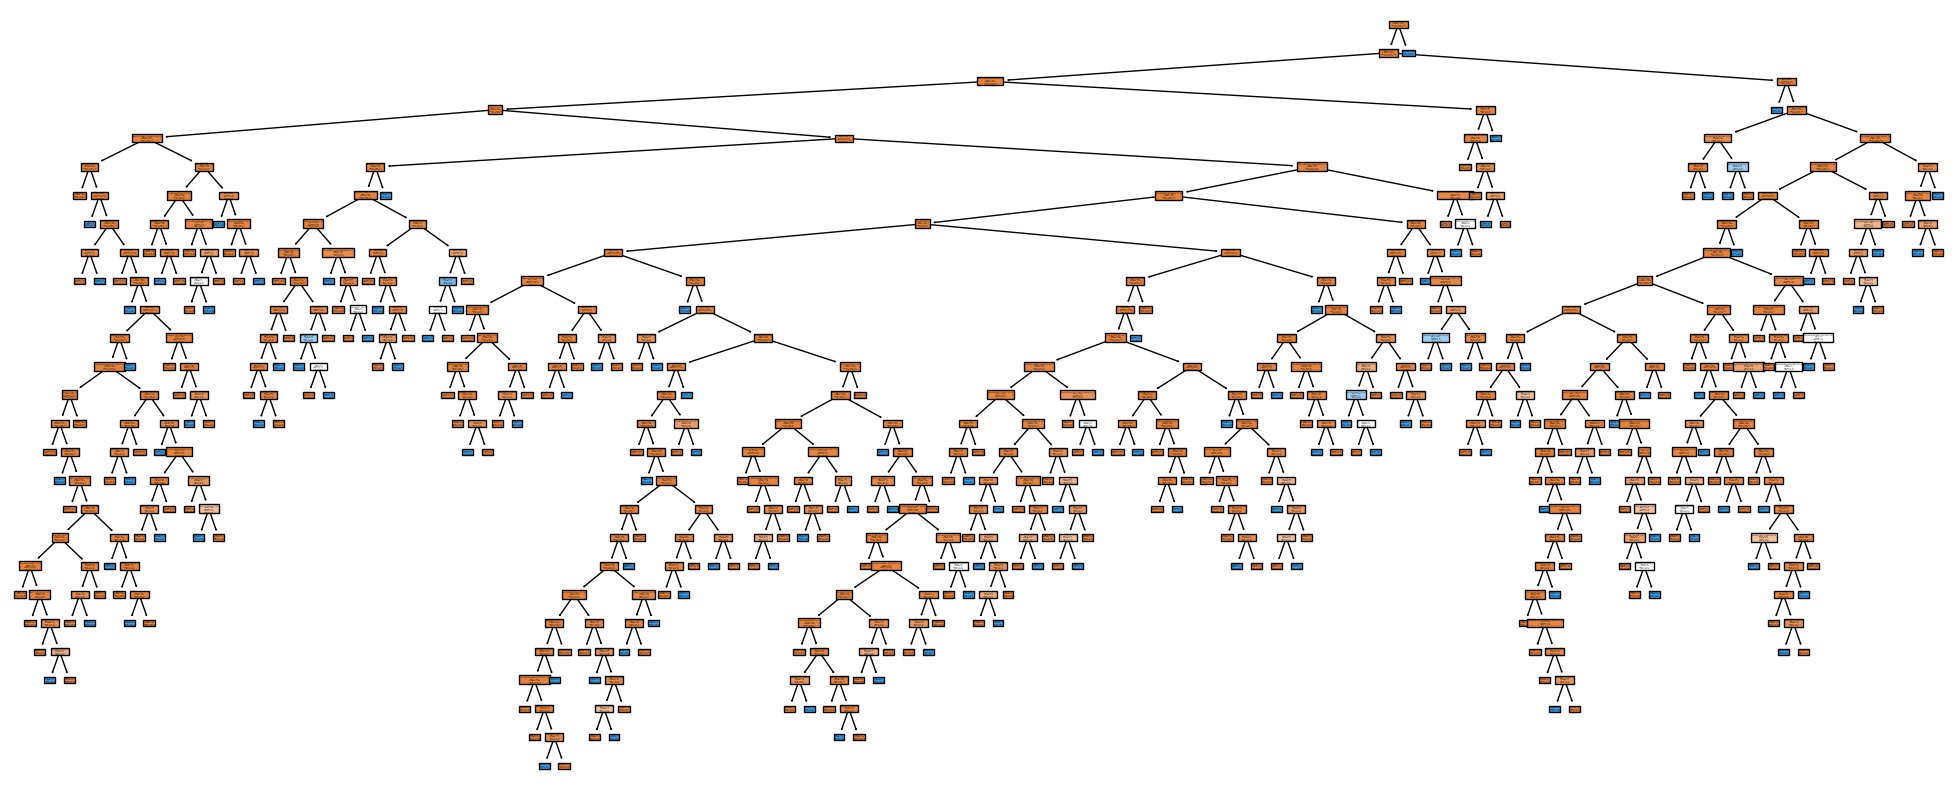

In [17]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=X.columns);

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


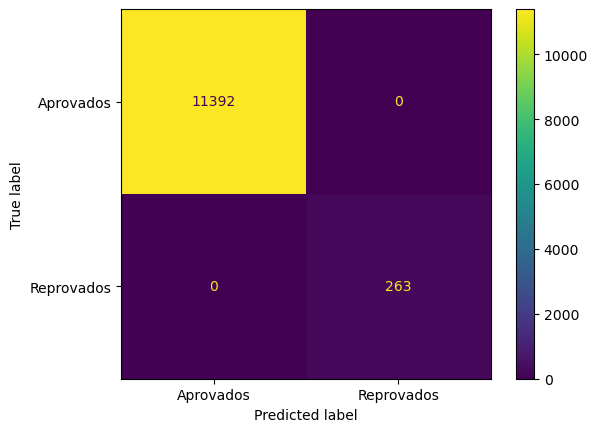

In [18]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);

In [20]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9937537537537537

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [23]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([False, False, False, ..., False, False, False])

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


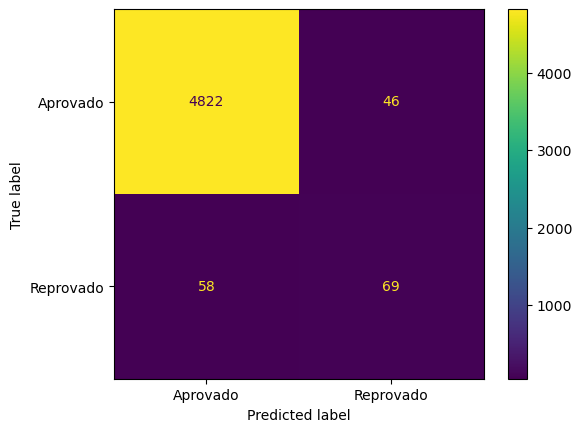

In [21]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [24]:
accuracy_score(y_test, y_chapeu_teste)

0.9791791791791792

In [25]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5 ,random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


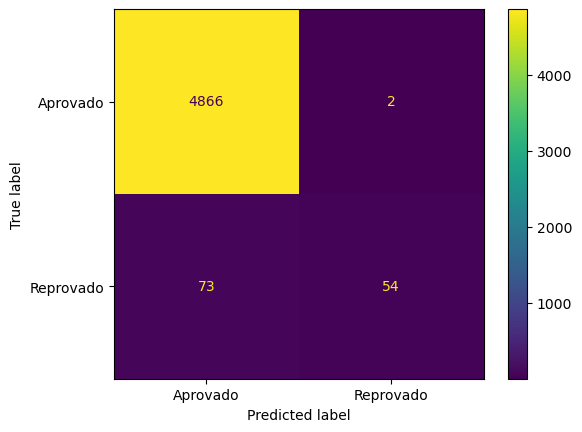

In [27]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado']);

#1% dos carros foram corretamente classificados como reprovado